## Preprocessing of Data

In [61]:
import numpy as np
import os
import pandas as pd
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.layers import GaussianNoise
from skimage.util import random_noise
import torch
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from collections import Counter

## Read in Data:

In [91]:
dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years'
pat1 =  pd.DataFrame()

for filename in os.listdir(dirname):
    f = os.path.join(dirname, filename)
    x = f.replace('\\', '/')
    #print(x) 
    f = filename.replace('.csv','')
    print(f)

BeinLi_10HZ
BeinRe_10HZ
C3M2_10HZ
C4M1_10HZ
EMG_10HZ
F3M2_10HZ
F4M1_10HZ
LEOGM2_10HZ
O1M2_10HZ
O2M1_10HZ
REOGM1_10HZ
SleepStaging


In [89]:
#30 seconds 1 label - 10 Hz = 1/s = 300 samples - 1 label
dirname= '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/BeinLi_10HZ.csv'
BeinLi_10HZ = pd.read_csv(dirname) 
#BeinLi_10HZ = BeinLi_10HZ.dropna(axis=1) #drop column with NaNs
BeinLi_10HZ = BeinLi_10HZ['21:34:06']
print(BeinLi_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/BeinRe_10HZ.csv'
BeinRe_10HZ = pd.read_csv(dirname) 
BeinRe_10HZ = BeinRe_10HZ['21:34:06']
print(BeinRe_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/C3M2_10HZ.csv'
C3M2_10HZ = pd.read_csv(dirname) 
C3M2_10HZ = C3M2_10HZ['21:34:06']
print(C3M2_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/C4M1_10HZ.csv'
C4M1_10HZ = pd.read_csv(dirname) 
C4M1_10HZ = C4M1_10HZ['21:34:06']
print(C4M1_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/EMG_10HZ.csv'
EMG_10HZ = pd.read_csv(dirname) 
EMG_10HZ = EMG_10HZ['21:34:06']
print(EMG_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/F3M2_10HZ.csv'
F3M2_10HZ = pd.read_csv(dirname) 
F3M2_10HZ = F3M2_10HZ['21:34:06']
print(F3M2_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/F4M1_10HZ.csv'
F4M1_10HZ = pd.read_csv(dirname) 
F4M1_10HZ = F4M1_10HZ['21:34:06']
print(F4M1_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/LEOGM2_10HZ.csv'
LEOGM2_10HZ = pd.read_csv(dirname) 
LEOGM2_10HZ = LEOGM2_10HZ['21:34:06']
print(LEOGM2_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/O1M2_10HZ.csv'
O1M2_10HZ = pd.read_csv(dirname) 
O1M2_10HZ = O1M2_10HZ['21:34:06']
print(O1M2_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/O2M1_10HZ.csv'
O2M1_10HZ = pd.read_csv(dirname) 
O2M1_10HZ = O2M1_10HZ['21:34:06']
print(O2M1_10HZ)

dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/REOGM1_10HZ.csv'
REOGM1_10HZ = pd.read_csv(dirname) 
REOGM1_10HZ = REOGM1_10HZ['21:34:06']
print(REOGM1_10HZ)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
327305    2.0
327306   -2.0
327307    0.0
327308    1.0
327309    2.0
Name: 21:34:06, Length: 327310, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
327305    3.0
327306   -3.0
327307    4.0
327308    1.0
327309    2.0
Name: 21:34:06, Length: 327310, dtype: float64
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
327305     9.0
327306     7.0
327307    42.0
327308    36.0
327309    31.0
Name: 21:34:06, Length: 327310, dtype: float64
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
327305    24.0
327306    21.0
327307    53.0
327308    25.0
327309    40.0
Name: 21:34:06, Length: 327310, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
327305    1.0
327306    7.0
327307   -1.0
327308    9.0
327309    8.0
Name: 21:34:06, Leng

In [99]:
BeinLi = []
i = 0
while i < len(BeinLi_10HZ):
    x = BeinLi_10HZ[i:i+300].sum()/300
    BeinLi.append(x)
    i = i + 300

BeinRe = []
i = 0
while i < len(BeinLi_10HZ):
    x = BeinRe_10HZ[i:i+300].sum()/300
    BeinRe.append(x)
    i = i + 300
    
C3M2 = []
i = 0
while i < len(BeinLi_10HZ):
    x = C3M2_10HZ[i:i+300].sum()/300
    C3M2.append(x)
    i = i + 300    

C4M1 = []
i = 0
while i < len(BeinLi_10HZ):
    x = C4M1_10HZ[i:i+300].sum()/300
    C4M1.append(x)
    i = i + 300

EMG = []
i = 0
while i < len(BeinLi_10HZ):
    x = EMG_10HZ[i:i+300].sum()/300
    EMG.append(x)
    i = i + 300
    
F3M2 = []
i = 0
while i < len(BeinLi_10HZ):
    x = F3M2_10HZ[i:i+300].sum()/300
    F3M2.append(x)
    i = i + 300

F4M1 = []
i = 0
while i < len(BeinLi_10HZ):
    x = F4M1_10HZ[i:i+300].sum()/300
    F4M1.append(x)
    i = i + 300
    
LEOGM2 = []
i = 0
while i < len(BeinLi_10HZ):
    x = LEOGM2_10HZ[i:i+300].sum()/300
    LEOGM2.append(x)
    i = i + 300    

O1M2 = []
i = 0
while i < len(BeinLi_10HZ):
    x = O1M2_10HZ[i:i+300].sum()/300
    O1M2.append(x)
    i = i + 300   
    

O2M1 = []
i = 0
while i < len(BeinLi_10HZ):
    x = O2M1_10HZ[i:i+300].sum()/300
    O2M1.append(x)
    i = i + 300   
    
REOGM1 = []
i = 0
while i < len(BeinLi_10HZ):
    x = REOGM1_10HZ[i:i+300].sum()/300
    REOGM1.append(x)
    i = i + 300 

print(BeinLi)
print(BeinRe)
print(C3M2)
print(C4M1)
print(EMG)
print(F3M2)
print(F4M1)
print(LEOGM2)
print(O1M2)
print(O2M1)
print(REOGM1)

[0.78, -0.3333333333333333, 0.92, -0.02, 1.0033333333333334, 0.3466666666666667, -0.7566666666666667, 0.9866666666666667, -1.64, 0.79, 0.5766666666666667, -0.023333333333333334, 1.1466666666666667, -1.4633333333333334, -0.6633333333333333, -0.01, -0.18666666666666668, 0.02666666666666667, 0.043333333333333335, -0.06, -0.22666666666666666, 0.55, 0.19333333333333333, -1.1266666666666667, -1.5166666666666666, -1.0533333333333332, -0.6533333333333333, 0.8233333333333334, -0.05333333333333334, -2.36, -0.8966666666666666, 0.15666666666666668, 0.30333333333333334, -0.33, -0.05, 1.1666666666666667, -1.08, -0.67, 0.27666666666666667, 0.38333333333333336, 0.45, 0.23666666666666666, 0.05, -0.6666666666666666, 0.04666666666666667, -0.05333333333333334, 0.08, -0.9533333333333334, 0.05333333333333334, 0.056666666666666664, -0.31, -0.006666666666666667, 1.3433333333333333, 0.05, 0.4066666666666667, -0.4533333333333333, -0.09333333333333334, -0.19666666666666666, -0.3233333333333333, -0.29666666666666

## Labels:

In [79]:
dirname = '../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/SleepStaging.csv'

label = pd.read_csv(dirname)   
#label = label.dropna(axis=1) #drop column with NaNs
label = label['Schlafstadium']
print(label)

converted_label = label.replace(['WK', 'REM', 'N1', 'N2', 'N3'], [0, 1, 2, 3, 4])
print(converted_label)

0        WK
1        WK
2        WK
3        WK
4        WK
       ... 
1087     WK
1088     WK
1089     WK
1090     WK
1091    REM
Name: Schlafstadium, Length: 1092, dtype: object
0       0
1       0
2       0
3       0
4       0
       ..
1087    0
1088    0
1089    0
1090    0
1091    1
Name: Schlafstadium, Length: 1092, dtype: int64


## Plot data and labels

In [115]:
fig = go.Figure()

fig.add_trace(go.Scatter(
            x = BeinLi,
            y = converted_label,
            #line =  dict(shape =  'spline' ),
            marker=dict(color="gold", size=12),
            mode="markers",
            name = 'BeinLi')
            )
fig.add_trace(go.Scatter(
            x = BeinRe,
            y = converted_label,
            marker=dict(color="blue", size=12),
            mode="markers",
            name = 'BeinRe')
            )
fig.add_trace(go.Scatter(
            x = C3M2,
            y = converted_label,
            marker=dict(color="red", size=12),
            mode="markers",
            name = 'C3M2')
            )
fig.add_trace(go.Scatter(
            x = C4M1,
            y = converted_label,
            marker=dict(color="green", size=12),
            mode="markers",
            name = 'C4M1')
            )
fig.add_trace(go.Scatter(
            x = EMG,
            y = converted_label,
            marker=dict(color="orange", size=12),
            mode="markers",
            name = 'EMG')
            )
fig.add_trace(go.Scatter(
            x = F3M2,
            y = converted_label,
            marker=dict(color="lime", size=12),
            mode="markers",
            name = 'F3M2')
            )
fig.add_trace(go.Scatter(
            x = F4M1,
            y = converted_label,
            marker=dict(color="lavender", size=12),
            mode="markers",
            name = 'F4M1')
            )
fig.add_trace(go.Scatter(
            x = LEOGM2,
            y = converted_label,
            marker=dict(color="crimson", size=12),
            mode="markers",
            name = 'LEOGM2')
            )
fig.add_trace(go.Scatter(
            x = O1M2,
            y = converted_label,
            marker=dict(color="seagreen", size=12),
            mode="markers",
            name = 'O1M2')
            )
fig.add_trace(go.Scatter(
            x = O2M1,
            y = converted_label,
            marker=dict(color="magenta", size=12),
            mode="markers",
            name = 'O2M1')
            )
fig.add_trace(go.Scatter(
            x = REOGM1,
            y = converted_label,
            marker=dict(color="deepskyblue", size=12),
            mode="markers",
            name = 'REOGM1')
            )
fig.show()

## Sampling frequency normalization

In [122]:
data = [BeinLi, BeinRe,C3M2, C4M1, EMG, F3M2, F4M1, LEOGM2, O1M2, O2M1, REOGM1]
norm_arr = []
#for i in data:
    #norm_arr.append(preprocessing.normalize(i), axis=0, copy=False, norm=l1)

print(norm_arr)
print(len(norm_arr))

[]
0


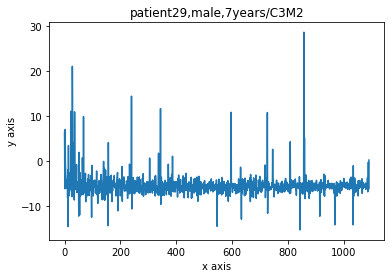

In [128]:
y= C3M2
x = np.arange(0, len(C3M2))
plt.plot(x,y) 
plt.title("patient29,male,7years/C3M2")
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.show()

## Data Augmentation:
- Gaussian Noise Injection
- Synthetic Minority Oversampling Technique SMOTE

[ 6.45666667 -6.16        6.98333333 ... -0.24       -6.26666667
  0.22333333]
[ 1.         -1.          1.         ...  0.13425252 -1.
  1.        ]
[ 6.45666667 -6.16        6.98333333 ...  0.13425252 -1.
  1.        ]


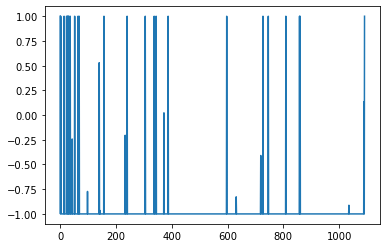

In [131]:
#Gaussian Noise Injection
np_C3M2 = np.asarray(C3M2)
print(np_C3M2)
gauss = torch.tensor(random_noise(np_C3M2, mode='gaussian', mean=0.5, var=0.05, clip=True))#GaussianNoise(0.2, seed=None, True)
gauss = gauss.numpy()
print(gauss)

y= gauss
x = np.arange(0, len(gauss))
plt.plot(x,y) 

gauss_data = np.concatenate((np_C3M2, gauss),axis=0)
print(gauss_data)

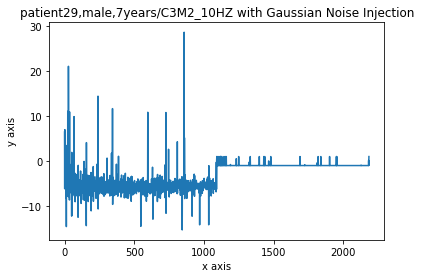

In [132]:
y= gauss_data
x = np.arange(0, len(gauss_data))

# PLot

plt.plot(x,y) 

# Add Title

plt.title("patient29,male,7years/C3M2_10HZ with Gaussian Noise Injection") 

# Add Axes Labels

plt.xlabel("x axis") 
plt.ylabel("y axis") 

# Display

plt.show()

## Synthetic Minority Oversampling Technique SMOTE

In [144]:
#Synthetic Minority Oversampling Technique SMOTE
y_train = converted_label
t = np_C3M2.reshape(-1, 1)
x_train = t

#print(x_train)

Counter(y_train)

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train == 2))) 
print("Before OverSampling, counts of label '3': {} \n".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '4': {} \n".format(sum(y_train == 4)))

sm = SMOTE(sampling_strategy={0:300,1: 300, 2: 300, 3: 499, 4: 300}, k_neighbors=5,random_state = 100)
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3))) 
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4))) 


Before OverSampling, counts of label '0': 99
Before OverSampling, counts of label '1': 260 

Before OverSampling, counts of label '2': 20
Before OverSampling, counts of label '3': 499 

Before OverSampling, counts of label '4': 214 

After OverSampling, the shape of train_X: (1699, 1)
After OverSampling, the shape of train_y: (1699,) 

After OverSampling, counts of label '0': 300
After OverSampling, counts of label '1': 300
After OverSampling, counts of label '2': 300
After OverSampling, counts of label '3': 499
After OverSampling, counts of label '4': 300


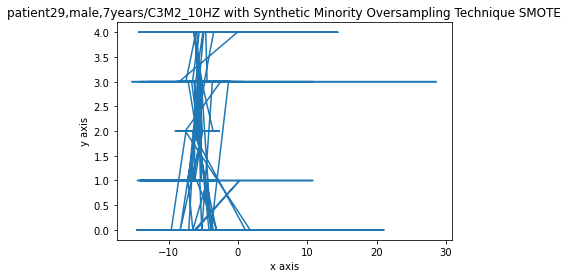

In [145]:
y= y_train_res
x = X_train_res
plt.plot(x,y) 
plt.title("patient29,male,7years/C3M2_10HZ with Synthetic Minority Oversampling Technique SMOTE") 
plt.xlabel("x axis") 
plt.ylabel("y axis") 
plt.show()

In [ ]:
#np.save(r"../data/Exercises_SS22/Sleep_data_downsampling_AllSensorChannels_10HZ/sleep_data_downsampling_AllSensorChannels_ lowfrequency_10HZ/patient29,male,7years/C3M2_10HZ_noise.csv", gauss)